In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

In [187]:
import torch
import tqdm.auto as tqdm
from orthogonal_dfa.module.monotonic import Monotonic2DFixedRange

In [251]:
m = Monotonic2DFixedRange(3, 100)
opt = torch.optim.Adam(m.parameters(), lr=1e-1)
for _ in tqdm.trange(10000):
    opt.zero_grad()
    a = torch.tensor([0.0, 1.0, 1.0])
    b = torch.tensor([1.0, 0.0, 1.0])
    c = torch.tensor([1.0, -3.0, 2.0])
    targ = m(a, b)
    # print(targ)
    ((targ - c) ** 2).sum().backward()
    opt.step()
m = m.eval()

  0%|          | 0/10000 [00:00<?, ?it/s]

In [252]:
targ

tensor([ 1.0000, -2.9982,  2.0000], grad_fn=<DivBackward0>)

In [253]:
x, y = torch.meshgrid(
    torch.linspace(-5, 5, 1000), torch.linspace(-5, 5, 1000), indexing="xy"
)
z = m(x, y).detach().cpu().numpy()
# z = z[::-1]

In [254]:
contours = [
    z.shape[0] - ((z[::-1] > thresh) * np.arange(z.shape[0])[:, None]).max(0)
    for thresh in np.linspace(-3, 3, 10)
]

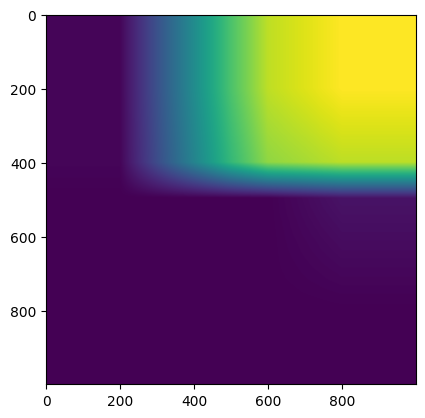

In [255]:
plt.imshow(z[::-1])

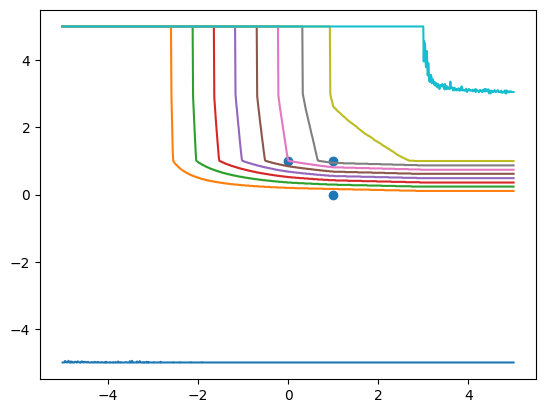

In [256]:
# plt.imshow(z > 0)
for x in contours:
    plt.plot(np.linspace(-5, 5, 1000), x / 1000 * 10 - 5)
plt.scatter(a.numpy(), b.numpy())
# plt.plot()
# plt.colorbar()

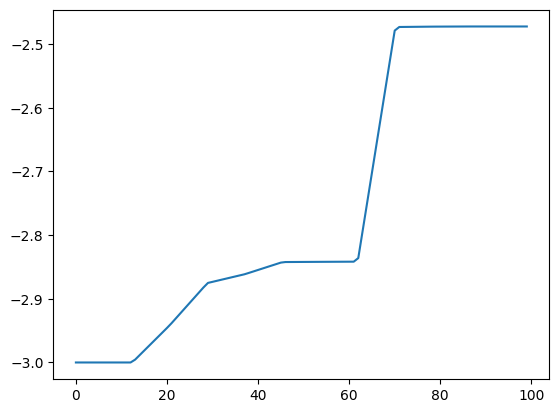

In [219]:
plt.plot(m(torch.linspace(-4, 4, 100), torch.tensor(-4.0)).detach().numpy())

In [ ]:
q